<a href="https://colab.research.google.com/github/Harikageddapu/My-first-repo/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Machine Learning Fake job Prediction Project")

Machine Learning Fake job Prediction Project


# New Section

In [ ]:
import pandas as pd
import numpy as np


df=pd.read_csv('/DataSet.csv')
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

(17880, 18)

In [ ]:
df.isnull().sum()

,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,0
requirements,2689
benefits,7196
telecommuting,0
has_company_logo,0


In [ ]:
df.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'in_balanced_dataset'],
      dtype='object')

In [ ]:
df.columns=df.columns.str.strip()
if'Column_Name' in df.columns:
   df.drop('Column_Name',axis=1,inplace=True)
df.dropna(inplace=True)

In [ ]:
text_cols=df.select_dtypes(include='object').columns
num_cols=df.select_dtypes(include=['int64','float64']).columns
for col in text_cols:
  df[col]=df[col].fillna('Unknown')
for col in num_cols:
  df[col]=df[col].fillna(df[col].mean())
df.drop_duplicates(inplace=True)
target_col='fradulent'
if target_col in df.columns:
  df[target_col]=df[target_col].map({'Yes':1,'No':0})
print(df.info())
print(df.head)

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 6 to 17865
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                757 non-null    object
 1   location             757 non-null    object
 2   department           757 non-null    object
 3   salary_range         757 non-null    object
 4   company_profile      757 non-null    object
 5   description          757 non-null    object
 6   requirements         757 non-null    object
 7   benefits             757 non-null    object
 8   telecommuting        757 non-null    object
 9   has_company_logo     757 non-null    object
 10  has_questions        757 non-null    object
 11  employment_type      757 non-null    object
 12  required_experience  757 non-null    object
 13  required_education   757 non-null    object
 14  industry             757 non-null    object
 15  function             757 non-null    object
 16  fraudulent 

In [ ]:
X=df.drop('fraudulent',axis=1)
y=df['fraudulent']
text_cols=X.select_dtypes(include='object').columns
if len(text_cols)>0 :
  for col in text_cols:
    X[col]=X[col].astype('category').cat.codes

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
    )
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)  # training features
print(X_test.shape)   # testing features
print(y_train.shape)  # training labels
print(y_test.shape)   # testing labels

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

(605, 17)
(152, 17)
(605,)
(152,)
=== Logistic Regression ===
Accuracy: 0.9079
Confusion Matrix:
[[135   1]
 [ 13   3]]


=== Random Forest ===
Accuracy: 0.9671
Confusion Matrix:
[[136   0]
 [  5  11]]


=== Gradient Boosting ===
Accuracy: 0.9737
Confusion Matrix:
[[135   1]
 [  3  13]]


=== K-Nearest Neighbors ===
Accuracy: 0.9539
Confusion Matrix:
[[133   3]
 [  4  12]]




=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-n

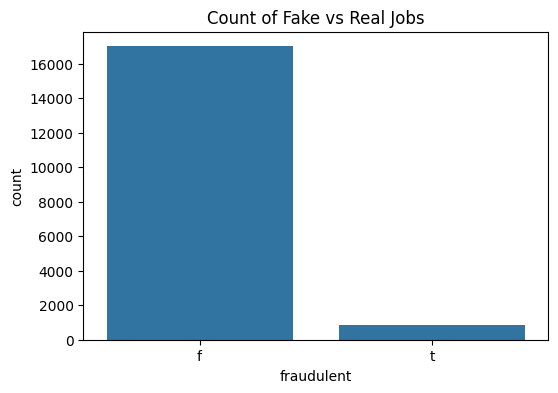

Not enough numeric columns for correlation heatmap.


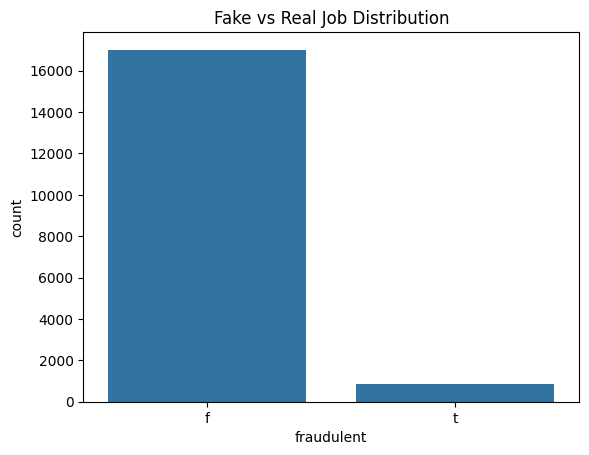

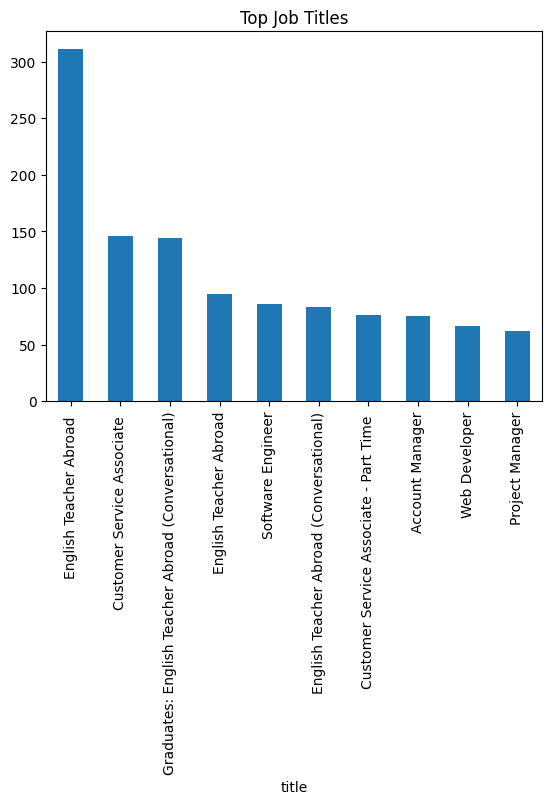

,0
salary_range,15012
department,11547
required_education,8105
benefits,7196
required_experience,7050
function,6455
industry,4903
employment_type,3471
company_profile,3308
requirements,2689


In [ ]:
# =========================
# Step 0: Import libraries
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Step 1: Load dataset
# =========================
df = pd.read_csv('/DataSet.csv')   # replace with your path
df.columns = df.columns.str.strip()        # remove extra spaces

# =========================
# Step 2: Exploratory Data Analysis (EDA)
# =========================

# 2a: Basic info
print("=== Dataset Info ===")
print(df.info())
print("\n")

# 2b: First 5 rows
print("=== First 5 rows ===")
print(df.head())
print("\n")

# 2c: Check missing values
print("=== Missing values ===")
print(df.isnull().sum())
print("\n")

# 2d: Summary statistics for numeric columns
print("=== Numeric Summary ===")
print(df.describe())
print("\n")

# =========================
# Step 3: Data Visualization
# =========================

# 3a: Count of Fake vs Real Jobs
if 'fraudulent' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='fraudulent', data=df)
    plt.title("Count of Fake vs Real Jobs")
    plt.show()

# 3b: Distribution of numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# 3c: Correlation heatmap
# 3c: Correlation heatmap (SAFE VERSION)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Heatmap")
    plt.show()

else:
    print("Not enough numeric columns for correlation heatmap.")
# Fake vs Real jobs
sns.countplot(x='fraudulent', data=df)
plt.title("Fake vs Real Job Distribution")
plt.show()

# Top job titles
df['title'].value_counts().head(10).plot(kind='bar')
plt.title("Top Job Titles")
plt.show()

# Missing values
df.isnull().sum().sort_values(ascending=False).head(10)



In [ ]:
features = ['title', 'company_profile', 'description', 'requirements', 'benefits']
target = 'fraudulent'

df[features] = df[features].fillna('')  # handle missing text
df['text'] = (
    df['title'] + ' ' +
    df['company_profile'] + ' ' +
    df['description'] + ' ' +
    df['requirements'] + ' ' +
    df['benefits']
)
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['text']
y = df['fraudulent']

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_vectorized = vectorizer.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized,
    y,
    test_size=0.2,
    random_state=42
)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized,
    y,
    test_size=0.2,
    random_state=42
)


In [ ]:
%%writefile app.py
import streamlit as st
import pickle

model = pickle.load(open("fake_job_model.pkl", "rb"))
vectorizer = pickle.load(open("tfidf.pkl", "rb"))

st.title("Fake Job Prediction")

text = st.text_area("Enter job description")

if st.button("Predict"):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)

    if prediction[0] == 1:
        st.error("⚠️ Fake Job")
    else:
        st.success("✅ Real Job")

Writing app.py
